## Name - Vaibhav R. Gudulkar

# Assignment - Decision Tree (Fraud_check.csv)

In [2]:
# Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

In [5]:
# Importing Dataset

fraud_df = pd.read_csv('Fraud_check.csv')
fraud_df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [46]:
fraud_df.sample(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_value
7,1,2,62774,131253,3,1,Good
522,0,0,43980,103343,10,0,Good
573,1,1,59227,116161,20,0,Good
13,0,1,61830,86649,16,1,Good
128,0,1,97984,100897,27,1,Good


In [7]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
fraud_data= fraud_df

In [9]:
#Label encoding for categorical data

label_encoder = preprocessing.LabelEncoder()
fraud_data['Undergrad']= label_encoder.fit_transform (fraud_data['Undergrad'])
fraud_data['Marital.Status'] =label_encoder.fit_transform(fraud_data['Marital.Status'])
fraud_data['Urban'] = label_encoder.fit_transform(fraud_data['Urban'])

In [10]:
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [11]:
#Categorising data based on Taxable income


tax_value =[]
for value in fraud_data['Taxable.Income'] :
    if value <=30000:
        tax_value.append('Risky')
    else :
        tax_value.append('Good')
fraud_data['tax_value']= tax_value

In [12]:
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_value
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [13]:
fraud_data1= fraud_data

In [14]:
#label encoding of 'tax_value' column

#fraud_data1['tax_value']= label_encoder.fit_transform(fraud_data1['tax_value'])

In [15]:
fraud_data1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_value
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [16]:
fraud_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    int32 
 1   Marital.Status   600 non-null    int32 
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    int32 
 6   tax_value        600 non-null    object
dtypes: int32(3), int64(3), object(1)
memory usage: 25.9+ KB


In [17]:
fraud_data2= fraud_data1.drop(['Taxable.Income'], axis=1)
fraud_data2

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_value
0,0,2,50047,10,1,Good
1,1,0,134075,18,1,Good
2,0,1,160205,30,1,Good
3,1,2,193264,15,1,Good
4,0,1,27533,28,0,Good
...,...,...,...,...,...,...
595,1,0,39492,7,1,Good
596,1,0,55369,2,1,Good
597,0,0,154058,0,1,Good
598,1,1,180083,17,0,Good


In [18]:
# Define Independent & dependent variable

# Independent variable
x= fraud_data2.iloc[:,0:5]  

# Dependent variable
y= fraud_data2['tax_value']

In [19]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [20]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: tax_value, Length: 600, dtype: object

In [21]:
# Unique classes Identification

fraud_data2['tax_value'].unique()

array(['Good', 'Risky'], dtype=object)

In [22]:
# count of each class

fraud_data2.tax_value.value_counts()

Good     476
Risky    124
Name: tax_value, dtype: int64

In [23]:
#Spliting data into Train and Test

x_train, x_test, y_train,y_test= train_test_split(x,y, test_size=0.3, random_state=40)

### Decision Tree Classifier (C 5.0) using Entropy criteria

In [24]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=2)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

Text(0.5, 1.0, 'Decision tree using entropy')

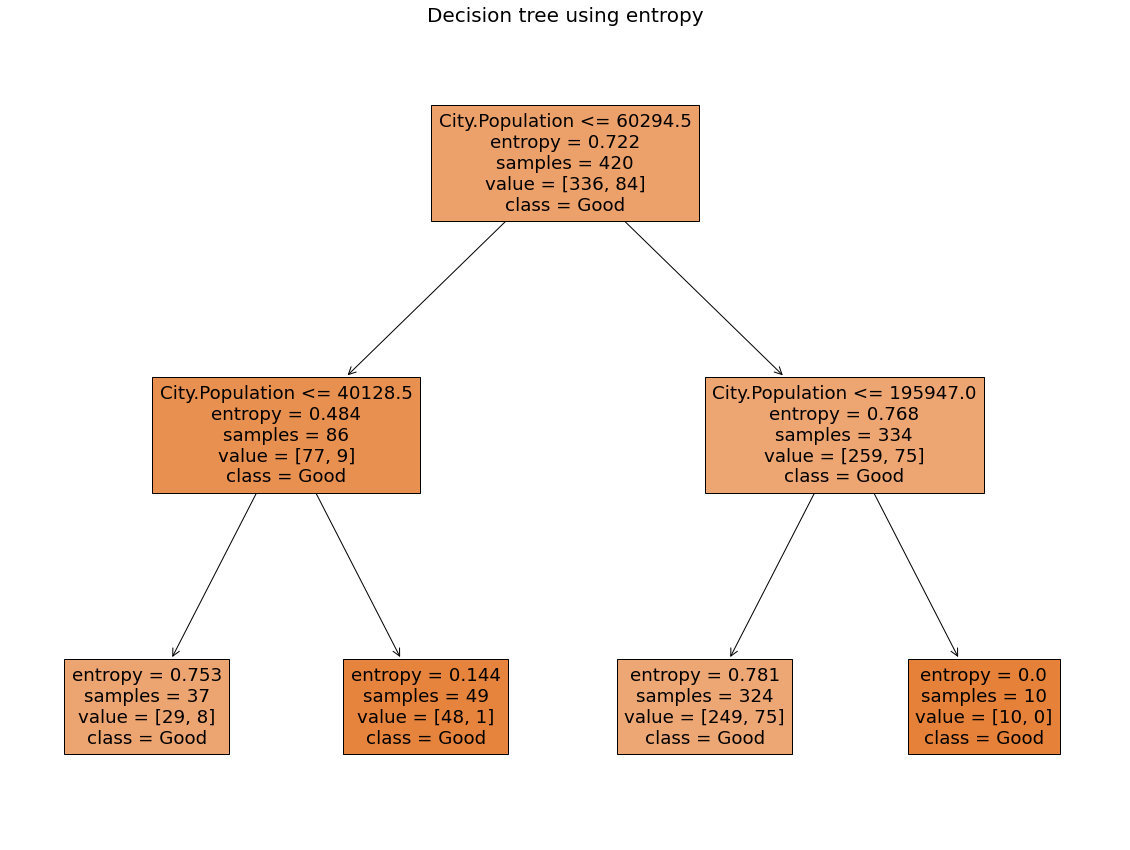

In [27]:
# Visualisation of Decision Tree

fig = plt.figure(figsize=(20,15))
tree.plot_tree(model, feature_names= ['Undergrad','Marital.Status','City.Population','Work.Experience','Urban'], class_names= ['Good', 'Risky'], filled=True)
plt.title('Decision tree using entropy', fontsize=20)

In [29]:
# Prediction on test data

pred=model.predict(x_test)
pd.Series(pred).value_counts()

Good    180
dtype: int64

In [30]:
pred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [31]:
#Cross Table

pd.crosstab(y_test,pred)

col_0,Good
tax_value,
Good,140
Risky,40


In [32]:
140/180

0.7777777777777778

In [34]:
#Calcualting Accuracy 

np.mean(pred==y_test)

0.7777777777777778

#### The Accuracy is 77 %

### Building Decision Tree Classifier (CART) using Gini Criteria

In [35]:
model1= DecisionTreeClassifier(criterion='gini', max_depth=2)
model1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

Text(0.5, 1.0, 'Decision tree using Gini criteria')

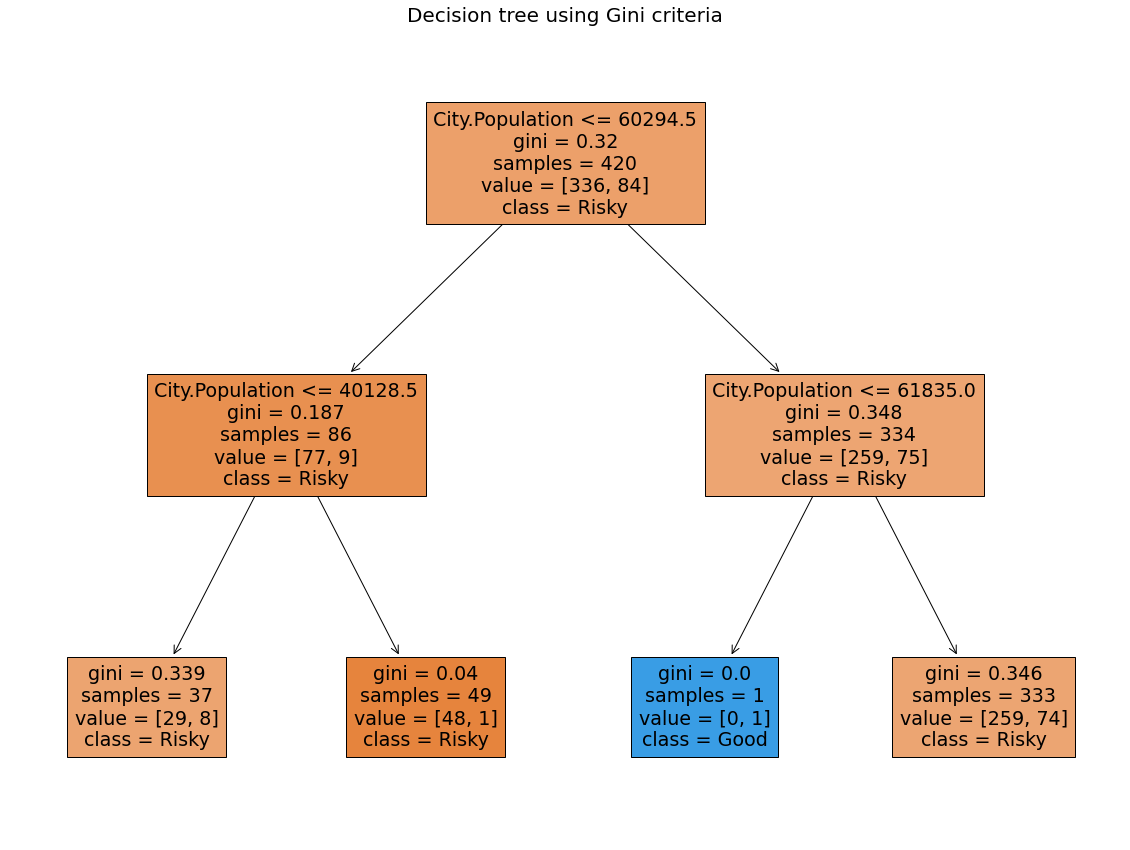

In [37]:
#Visualisation of Decision Tree

figure= plt.figure(figsize=(20,15))
tree.plot_tree(model1, feature_names=['Undergrad','Marital.Status','City.Population','Work.Experience','Urban'], class_names=['Risky', 'Good'], filled=True);
plt.title('Decision tree using Gini criteria', fontsize=20)

In [38]:
#Predicting values on test data

pred_gini = model1.predict(x_test)
pd.Series(pred_gini).value_counts() # getting the count of each category

Good    180
dtype: int64

In [39]:
pred_gini

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
      

In [40]:
#Cross Table

pd.crosstab(y_test, pred_gini)

col_0,Good
tax_value,
Good,140
Risky,40


In [43]:
140/180

0.7777777777777778

In [44]:
# Calculating Accuracy

np.mean(pred_gini==y_test)

0.7777777777777778

#### The Accuracy is 77 %